In [41]:
import numpy as np


In [42]:
np.random.seed(42)
X = 2* np.random.rand(100,1)  
X      # Uniformly distributed array with dimension (100,1)

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728],
       [0.31198904],
       [0.11616722],
       [1.73235229],
       [1.20223002],
       [1.41614516],
       [0.04116899],
       [1.9398197 ],
       [1.66488528],
       [0.42467822],
       [0.36364993],
       [0.36680902],
       [0.60848449],
       [1.04951286],
       [0.86389004],
       [0.58245828],
       [1.22370579],
       [0.27898772],
       [0.5842893 ],
       [0.73272369],
       [0.91213997],
       [1.57035192],
       [0.39934756],
       [1.02846888],
       [1.18482914],
       [0.09290083],
       [1.2150897 ],
       [0.34104825],
       [0.13010319],
       [1.89777107],
       [1.93126407],
       [1.6167947 ],
       [0.60922754],
       [0.19534423],
       [1.36846605],
       [0.88030499],
       [0.24407647],
       [0.99035382],
       [0.06877704],
       [1.8186408 ],
       [0.51755996],
       [1.32504457],
       [0.62342215],
       [1.040

In [43]:
y = 4       +           3 * X       + np.random.randn(100,1)
#  theta 0          theta1                  gAUSSIAN nOISE

In [44]:
import matplotlib.pyplot as plt

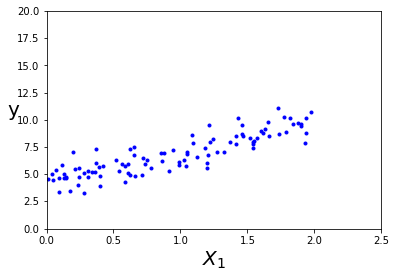

In [45]:
plt.plot(X,y,'b.')
plt.xlabel('$X_1$', fontsize = 20)
plt.ylabel('y', rotation = 0, fontsize = 20)
plt.axis([0,2.5,0,20])
plt.show()

In [46]:
X_b = np.c_[np.ones((100,1)),X]

In [47]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)        # putting the vsalues in formulae

In [48]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [49]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [50]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

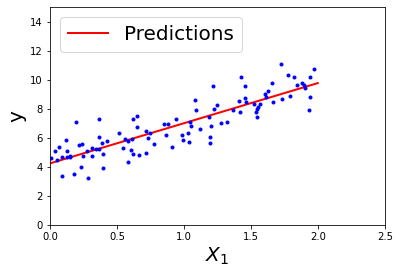

In [51]:
plt.plot(X_new,y_predict, 'r-',linewidth = 2, label = "Predictions")
plt.plot(X,y,'b.')
plt.xlabel("$X_1$", fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.axis([0,2.5,0,15])
plt.legend(fontsize = 20, loc = 'upper left')
plt.show()

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [54]:
lin_reg.intercept_ , lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [55]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

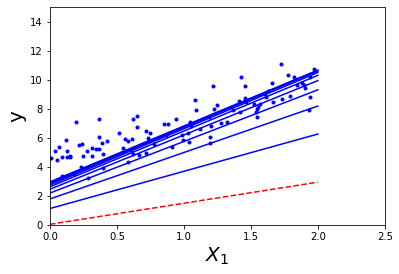

In [56]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    if iteration <10:
        y_predict = X_new_b.dot(theta)
        style = 'b-' if iteration > 0 else 'r--' 
        plt.plot(X_new, y_predict,style)
    theta = theta - eta* gradients
plt.plot(X,y,'b.')
plt.xlabel("$X_1$", fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.axis([0,2.5,0,15])
# plt.legend(fontsize = 20, loc = 'upper left')
plt.show()

In [57]:
theta

array([[4.21509616],
       [2.77011339]])

In [58]:
gradients

array([[-3.73034936e-15],
       [ 1.99852839e-15]])

In [59]:
def gradient_descent_check(eta, theta):
    m = len(X_b)    # number of rows/instances in my data
    for iteration in range(1000):
        delta_mse = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        if iteration <10:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if iteration > 0 else 'r--' 
            plt.plot(X_new, y_predict,style)
        theta = theta - eta* delta_mse
    plt.plot(X,y,'b.')
    plt.xlabel("$X_1$", fontsize = 20)
    plt.ylabel('y', rotation = 0, fontsize = 20)
    plt.title(f'n{eta}')
    plt.axis([0,2.5,0,15])

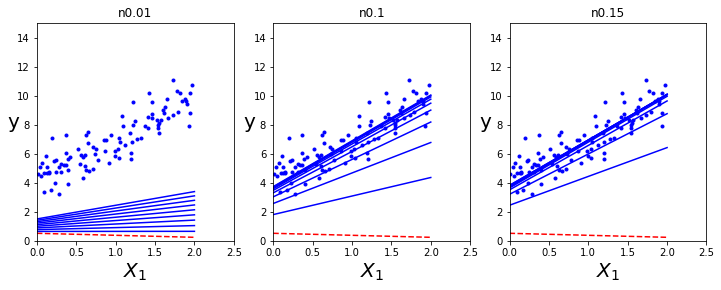

In [60]:
np.random.seed(42)
theta = np.random.randn(2,1)
plt.figure(figsize=(12,4))
plt.subplot(131); gradient_descent_check(.01, theta)
plt.subplot(132); gradient_descent_check(0.1,theta)
plt.subplot(133); gradient_descent_check(0.15,theta)
plt.show()

In [65]:
from sklearn.linear_model import SGDRegressor
sgd_regressor = SGDRegressor(eta0=0.1, random_state=42)
sgd_regressor.fit(X,y.ravel())

SGDRegressor(eta0=0.1, random_state=42)

In [66]:
sgd_regressor.intercept_, sgd_regressor.coef_

(array([4.24438563]), array([2.8242988]))

In [67]:
y_perdict_sgd = sgd_regressor.predict(X_new)
y_perdict_sgd

array([4.24438563, 9.89298323])

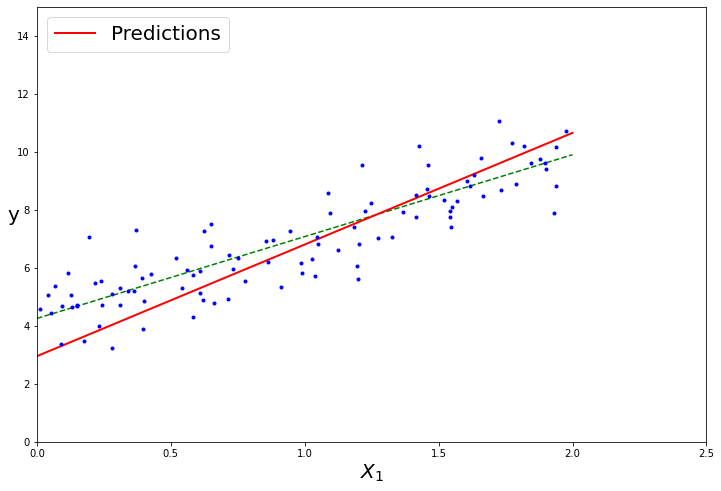

In [68]:
plt.figure(figsize=(12,8))
plt.plot(X_new, y_perdict_sgd, 'g--')
plt.plot(X_new,y_predict, 'r-',linewidth = 2, label = "Predictions")
plt.plot(X,y,'b.')
plt.xlabel("$X_1$", fontsize = 20)
plt.ylabel('y', rotation= 0,fontsize = 20)
plt.axis([0,2.5,0,15])
plt.legend(fontsize = 20, loc = 'upper left')
plt.show()

In [26]:
sgd_regressor.score(X,y)

0.7671373026562548

In [27]:
sgd_regressor.n_iter_

11